In [1]:
import os
import csv
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''CREATE TABLE IF NOT EXISTS numerical_data (
                    id INTEGER PRIMARY KEY,
                    age INTEGER,
                    bmi REAL,
                    children INTEGER,
                    charges REAL
                )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS categorical_data (
                    id INTEGER PRIMARY KEY,
                    sex TEXT,
                    smoker TEXT,
                    region TEXT
                )''')

# Read data from CSV and insert into tables
with open('medical insurance expensess-Copy1.csv', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Insert into numerical_data table
        numerical_data = (row['age'], row['bmi'], row['children'], row['charges'])
        cursor.execute('''INSERT INTO numerical_data (age, bmi, children, charges) VALUES (?, ?, ?, ?)''', numerical_data)
        numerical_id = cursor.lastrowid
        
        # Insert into categorical_data table
        categorical_data = (row['sex'], row['smoker'], row['region'])
        cursor.execute('''INSERT INTO categorical_data (sex, smoker, region) VALUES (?, ?, ?)''', categorical_data)
        categorical_id = cursor.lastrowid
        
        # Update numerical_data table with categorical_id
        cursor.execute('''UPDATE numerical_data SET id = ? WHERE rowid = ?''', (categorical_id, numerical_id))

# Commit changes and close connection
conn.commit()
conn.close()

In [2]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')
cursor = conn.cursor()

# Retrieve and print numerical data
print("Numerical Data:")
cursor.execute('''SELECT * FROM numerical_data''')
numerical_data = cursor.fetchall()
for row in numerical_data:
    print(row)

# Retrieve and print categorical data
print("\nCategorical Data:")
cursor.execute('''SELECT * FROM categorical_data''')
categorical_data = cursor.fetchall()
for row in categorical_data:
    print(row)

# Close connection
conn.close()


Numerical Data:
(1, 19, 27.9, 0, 16884.924)
(2, 18, 33.77, 1, 1725.5523)
(3, 28, 33.0, 3, 4449.462)
(4, 33, 22.705, 0, 21984.47061)
(5, 32, 28.88, 0, 3866.8552)
(6, 31, 25.74, 0, 3756.6216)
(7, 46, 33.44, 1, 8240.5896)
(8, 37, 27.74, 3, 7281.5056)
(9, 37, 29.83, 2, 6406.4107)
(10, 60, 25.84, 0, 28923.13692)
(11, 25, 26.22, 0, 2721.3208)
(12, 62, 26.29, 0, 27808.7251)
(13, 23, 34.4, 0, 1826.843)
(14, 56, 39.82, 0, 11090.7178)
(15, 27, 42.13, '', 39611.7577)
(16, 19, 24.6, 1, 1837.237)
(17, 52, 30.78, 1, 10797.3362)
(18, 23, 23.845, 0, 2395.17155)
(19, 56, 40.3, 0, 10602.385)
(20, 30, '', 0, 36837.467)
(21, 60, 36.005, 0, 13228.84695)
(22, 30, 32.4, 1, 4149.736)
(23, 18, 34.1, 0, 1137.011)
(24, 34, 31.92, 1, 37701.8768)
(25, 37, 28.025, 2, 6203.90175)
(26, 59, 27.72, 3, 14001.1338)
(27, 63, 23.085, 0, 14451.83515)
(28, 55, 32.775, 2, 12268.63225)
(29, 23, 17.385, 1, 2775.19215)
(30, 31, 36.3, 2, 38711.0)
(31, 22, 35.6, 0, 35585.576)
(32, 18, 26.315, 0, 2198.18985)
(33, 19, 28.6, 5, 4687.

In [3]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')

# SQL query with JOIN
query = """ SELECT numerical_data.id,numerical_data.age,numerical_data.bmi,numerical_data.children,
                   categorical_data.sex,categorical_data.region,categorical_data.smoker,numerical_data.charges
            FROM numerical_data
            JOIN categorical_data ON categorical_data.id = numerical_data.id;
        """

# Fetch data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display DataFrame
print(df)


        id age     bmi children     sex     region smoker      charges
0        1  19    27.9        0  female  southwest    yes    16884.924
1        2  18   33.77        1    male  southeast     no    1725.5523
2        3  28    33.0        3    male  southeast     no     4449.462
3        4  33  22.705        0    male  northwest     no  21984.47061
4        5  32   28.88        0    male  northwest     no    3866.8552
...    ...  ..     ...      ...     ...        ...    ...          ...
8023  8024  50   30.97        3    male  northwest     no   10600.5483
8024  8025  18   31.92        0  female  northeast     no    2205.9808
8025  8026  18   36.85        0  female  southeast     no    1629.8335
8026  8027  21    25.8        0  female  southwest     no     2007.945
8027  8028  61   29.07        0  female  northwest    yes   29141.3603

[8028 rows x 8 columns]


In [4]:
df.dtypes

id           int64
age         object
bmi         object
children    object
sex         object
region      object
smoker      object
charges     object
dtype: object

In [5]:
df.describe()

,id
count,8028.000000
mean,4014.500000
std,2317.628314
min,1.000000
25%,2007.750000
50%,4014.500000
75%,6021.250000
max,8028.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8028 non-null   int64 
 1   age       8028 non-null   object
 2   bmi       8028 non-null   object
 3   children  8028 non-null   object
 4   sex       8028 non-null   object
 5   region    8028 non-null   object
 6   smoker    8028 non-null   object
 7   charges   8028 non-null   object
dtypes: int64(1), object(7)
memory usage: 501.9+ KB


In [7]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Replace NaN values in 'age' column with the median
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# Convert 'children' column to numeric with errors set to 'coerce'
df['children'] = pd.to_numeric(df['children'], errors='coerce')
median_children = df['children'].median()
df['children'].fillna(median_children, inplace=True)

# Replace NaN values in 'children' column with 0
#df['children'].fillna(0, inplace=True)

# Convert 'bmi' column to numeric with errors set to 'coerce'
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Replace NaN values in 'bmi' column with the median
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

# Convert 'charges' column to numeric with errors set to 'coerce'
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Replace NaN values in 'charges' column with the mean
mean_charges = df['charges'].mean()
df['charges'].fillna(mean_charges, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
train, test = train_test_split(df, test_size=0.3, stratify=df['sex'], random_state=20240417)

In [9]:
train['sex'].value_counts() / len(train['sex'])
test['sex'].value_counts() / len(test['sex'])

sex
male      0.50525
female    0.49475
Name: count, dtype: float64

sex
male      0.505189
female    0.494811
Name: count, dtype: float64

In [10]:
train.head()

,id,age,bmi,children,sex,region,smoker,charges
2506,2507,32.0,35.200,2.0,male,southwest,no,4670.64000
7240,7241,63.0,30.800,0.0,male,southwest,no,13390.55900
7244,7245,25.0,41.325,0.0,female,northeast,no,17878.90068
1654,1655,50.0,32.205,0.0,male,northwest,no,8835.26495
6119,6120,42.0,29.000,1.0,female,southwest,no,7050.64200


In [11]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)
print(numerical_columns)

Index(['sex', 'region', 'smoker'], dtype='object')
Index(['id', 'age', 'bmi', 'children', 'charges'], dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8028 non-null   int64  
 1   age       8028 non-null   float64
 2   bmi       8028 non-null   float64
 3   children  8028 non-null   float64
 4   sex       8028 non-null   object 
 5   region    8028 non-null   object 
 6   smoker    8028 non-null   object 
 7   charges   8028 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 501.9+ KB


In [13]:
!pip install ydata-profiling

  Obtaining dependency information for dacite>=1.8 from https://files.pythonhosted.org/packages/21/0f/cf0943f4f55f0fbc7c6bd60caf1343061dff818b02af5a0d444e473bb78d/dacite-1.8.1-py3-none-any.whl.metadata
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Attempting uninstall: dacite
    Found existing installation: dacite 1.6.0
    Uninstalling dacite-1.6.0:
      Successfully uninstalled dacite-1.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dagshub 0.3.27 requires dacite~=1.6.0, but you have dacite 1.8.1 which is incompatible.


In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
trains=train
trains['smoker'] = trains['smoker'].replace({'no': 0, 'yes': 1})
numerical_columns = trains.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = trains.select_dtypes(include=['object', 'category']).columns

In [16]:
corr_matrix = trains.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.791206
age         0.293310
bmi         0.188894
children    0.066646
id         -0.003697
Name: charges, dtype: float64

Text(0.5, 1.0, 'Correlation Plot')

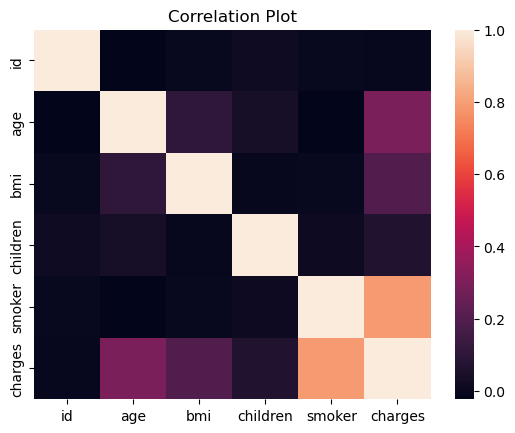

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.heatmap(trains.select_dtypes(exclude='object').corr()).set_title('Correlation Plot')
plt.show()

In [18]:
correlation_matrix = trains.select_dtypes(exclude='object').corr()
print(correlation_matrix)

                id       age       bmi  children    smoker   charges
id        1.000000 -0.023501 -0.000837  0.014592 -0.000596 -0.003697
age      -0.023501  1.000000  0.101911  0.039335 -0.022989  0.293310
bmi      -0.000837  0.101911  1.000000 -0.004394 -0.001987  0.188894
children  0.014592  0.039335 -0.004394  1.000000  0.009039  0.066646
smoker   -0.000596 -0.022989 -0.001987  0.009039  1.000000  0.791206
charges  -0.003697  0.293310  0.188894  0.066646  0.791206  1.000000


- Analysis of Correlation plot
- *Charges and Smoker
    - There is a strong positive correlation (0.784) between charges and smoker status
    - This suggests that individuals who smoke tend to have higher medical charges compared to non-smokers
- *Charges and Age
    - There is a moderate positive correlation (0.287) between charges and age
    - This indicates that as individuals get older their medical charges tend to increase
- *Charges and BMI
    - There is a weak positive correlation (0.193) between charges and BMI (Body Mass Index)
    - This suggests that individuals with higher BMI may have slightly higher medical charges
- *Charges and Children
    - There is a very weak positive correlation (0.074) between charges and the number of children
    - This indicates that there is a slight tendency for individuals with more children to have slightly higher medical charges
    
- Overall, the strongest correlation is observed between charges and smoker status, suggesting that smoking behavior has a significant impact on medical charges making it a strong predictor. Age also shows a moderate positive correlation with charges, indicating that age plays a role in determining medical expenses. However, BMI and the number of children have weaker correlations with charges compared to smoker status and age.

Text(0.5, 1.0, 'Analysis of medical insurance plans based on smoker')

<Axes: title={'center': 'Analysis of medical insurance plans based on smoker'}, xlabel='smoker', ylabel='charges'>

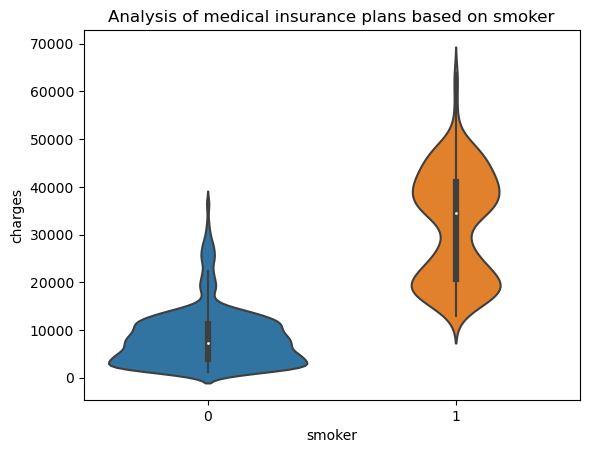

In [19]:
plt.title('Analysis of medical insurance plans based on smoker')
sns.violinplot(x='smoker', y='charges', data=trains)
plt.show()

*Analysis of medical insurance plans based on smoker
   - The obtained violin plot displays the distribution of medical insurance plans based on smoker status
   - There are more plans available for non-smokers, as shown by the wider violin on the left
   - Smokers face higher median insurance prices, as indicated by the higher horizontal line in the right violin
   - The price distribution is broader for smokers, suggesting greater variation in plans compared to non-smokers
   - The plot provides an overview of trends, it does not establish causality between smoking and insurance prices

Text(0.5, 1.0, 'Analysis of medical insurance plans based on sex')

<Axes: title={'center': 'Analysis of medical insurance plans based on sex'}, xlabel='sex', ylabel='charges'>

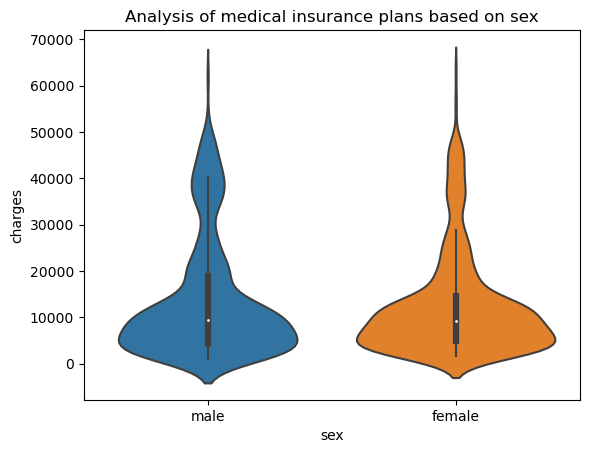

In [20]:
plt.title('Analysis of medical insurance plans based on sex')
sns.violinplot(x='sex', y='charges', data=trains)
plt.show()

*Analysis of medical insurance plans based on sex
   - The distribution of charges is wider for females than for males
   - A wider spread of the violin on the left side of the plot compared to the violin on the right side is observed
   - This suggests that there is more variation in the charges for medical insurance plans for females than for males
   - The median charge of medical insurance plans is higher for females than for males
   - This is shown by the fact that the horizontal line in the violin on the left is higher than the horizontal line in the violin on the right


Text(0.5, 1.0, 'Analysis of medical insurance plans based on region')

<Axes: title={'center': 'Analysis of medical insurance plans based on region'}, xlabel='region', ylabel='charges'>

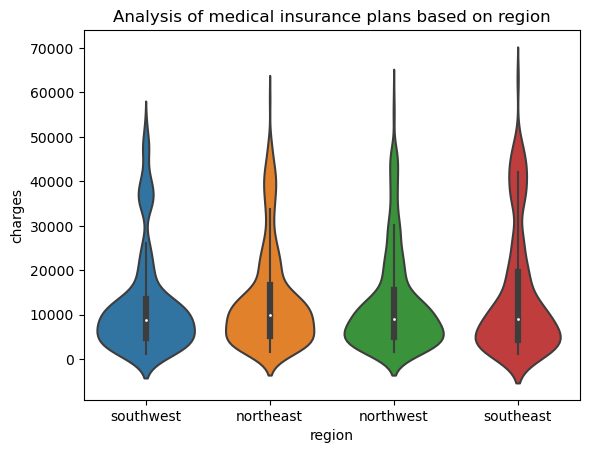

In [21]:
plt.title('Analysis of medical insurance plans based on region')
sns.violinplot(x='region', y='charges', data=trains)
plt.show()

*Analysis of medical insurance plans based on region
   - The violin plot illustrates the distribution of changes in medical insurance plans by region (northeast, southeast, northwest, southwest)
   - All regions exhibit almost a similar distribution, as indicated by the consistent width and spread across the violins
   - The northeast and southwest regions demonstrate a wider range of changes, as evidenced by the extended tails
   - In contrast, the southeast and northwest regions have a more confined range
   - The median change in plots is positive across all regions, with horizontal lines situated above zero 
   - This plot provides a visual overview of data trends, it doesn't convey specific changes in plan numbers

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = [
        'bmi', 
        'age',
        'children',
    ]
    categorical_columns = [
        'region',
        'sex',
        'smoker'
    ]
    
    def fit(self, X, y=None): 
        # Verify if 'charges' column exists in X

        # Create and fit simple imputer for numerical columns
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])

        # Create and fit Standard Scaler for numerical columns
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        # Create and fit one hot encoder for categorical columns
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])

        return self 



    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        # Drop existing categorical columns and replace with one hot equivalent
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [23]:
preprocessor = Preprocessor()
preprocessor.fit(df)
train_fixed = preprocessor.transform(df)

Preprocessor()

In [24]:
train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8028 non-null   int64  
 1   age               8028 non-null   float64
 2   bmi               8028 non-null   float64
 3   children          8028 non-null   float64
 4   charges           8028 non-null   float64
 5   region_northeast  8028 non-null   int32  
 6   region_northwest  8028 non-null   int32  
 7   region_southeast  8028 non-null   int32  
 8   region_southwest  8028 non-null   int32  
 9   sex_female        8028 non-null   int32  
 10  sex_male          8028 non-null   int32  
 11  smoker_no         8028 non-null   int32  
 12  smoker_yes        8028 non-null   int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 564.6 KB


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(Preprocessor(), RandomForestRegressor(n_estimators=50))

In [26]:
rfr

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [27]:
y_train = train['charges']
x_train=train.drop('charges', axis=1)
print(x_train)
print(y_train)
#x_train = train.iloc[:, list(range(0, 3)) + list(range(4,7))]
rfr.fit(x_train, y_train)

        id   age     bmi  children     sex     region  smoker
2506  2507  32.0  35.200       2.0    male  southwest       0
7240  7241  63.0  30.800       0.0    male  southwest       0
7244  7245  25.0  41.325       0.0  female  northeast       0
1654  1655  50.0  32.205       0.0    male  northwest       0
6119  6120  42.0  29.000       1.0  female  southwest       0
...    ...   ...     ...       ...     ...        ...     ...
6        7  46.0  33.440       1.0  female  southeast       0
7607  7608  45.0  22.895       0.0    male  northeast       1
3353  3354  60.0  31.350       3.0    male  northwest       1
1099  1100  25.0  33.990       1.0  female  southeast       0
2511  2512  38.0  29.260       2.0    male  northwest       0

[5619 rows x 7 columns]
2506     4670.64000
7240    13390.55900
7244    17878.90068
1654     8835.26495
6119     7050.64200
           ...     
6        8240.58960
7607    35069.37452
3353    46130.52650
1099     3227.12110
2511     6457.84340
Name: charg

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_train_hat=rfr.predict(x_train)
rmse=np.sqrt(mean_squared_error(y_train, y_train_hat))
mae=mean_absolute_error(y_train, y_train_hat)
mse=mean_squared_error(y_train, y_train_hat)
print("Root mean square error",rmse)
print("Mean absolute error",mae)
print("Mean squared error",mse)

Root mean square error 524.1785679255794
Mean absolute error 183.3177769117849
Mean squared error 274763.1710725113


In [29]:
params = rfr.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor(n_estimators=50))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(n_estimators=50),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 50,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose': 0,
 'randomfore

In [31]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict medical insurance charges")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rmse)
    mlflow.log_metric("mean_absolute_error", mae)
    mlflow.log_metric("mean_squared_error", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForestRegressor model for housing data, n_estimators=50")

    # Infer the model signature
    signature = infer_signature(x_train, rfr.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rfr,
        artifact_path="Predicting Medical Insurance Charges",
        signature=signature,
        #input_example=preprocessor.transform(X_train),
        registered_model_name="rfr_moodel_n_estimators=50",
    )

2024/05/16 16:46:49 INFO mlflow.tracking.fluent: Experiment with name 'Predict medical insurance charges' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/694777539047022305', creation_time=1715892409437, experiment_id='694777539047022305', last_update_time=1715892409437, lifecycle_stage='active', name='Predict medical insurance charges', tags={}>

C:\Users\Amulya Reddy Datla\anaconda3\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\Amulya Reddy Datla\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'rfr_moodel_

In [33]:
Dagshub_user_name = "Amulya12182001"

dagshub_email = "amulya1218@gmail.com"

dagshub_repo_name = "Medical_Insurance_Expense_Model"


In [34]:
import mlflow
from dagshub import dagshub_logger
import os


In [35]:
dagshub_repo = "https://dagshub.com/Amulya12182001/Medical_Insurance_Expense_Model.mlflow"
mlflow.set_tracking_uri(dagshub_repo)


In [36]:
# Replace 'your_personal_access_token' with your actual DagsHub personal access token
os.environ['MLFLOW_TRACKING_USERNAME'] = 'Amulya12182001'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'your_personal_access_token'


In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming Preprocessor() is defined elsewhere
linear_regression_model = make_pipeline(Preprocessor(), LinearRegression())


In [38]:
linear_regression_model

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('linearregression', LinearRegression())])

In [39]:
y_train = train['charges']
x_train=train.drop('charges', axis=1)
print(x_train)
print(y_train)
#x_train = train.iloc[:, list(range(0, 3)) + list(range(4,7))]
linear_regression_model.fit(x_train, y_train)

        id   age     bmi  children     sex     region  smoker
2506  2507  32.0  35.200       2.0    male  southwest       0
7240  7241  63.0  30.800       0.0    male  southwest       0
7244  7245  25.0  41.325       0.0  female  northeast       0
1654  1655  50.0  32.205       0.0    male  northwest       0
6119  6120  42.0  29.000       1.0  female  southwest       0
...    ...   ...     ...       ...     ...        ...     ...
6        7  46.0  33.440       1.0  female  southeast       0
7607  7608  45.0  22.895       0.0    male  northeast       1
3353  3354  60.0  31.350       3.0    male  northwest       1
1099  1100  25.0  33.990       1.0  female  southeast       0
2511  2512  38.0  29.260       2.0    male  northwest       0

[5619 rows x 7 columns]
2506     4670.64000
7240    13390.55900
7244    17878.90068
1654     8835.26495
6119     7050.64200
           ...     
6        8240.58960
7607    35069.37452
3353    46130.52650
1099     3227.12110
2511     6457.84340
Name: charg

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('linearregression', LinearRegression())])

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_train_hat=linear_regression_model.predict(x_train)
rmse=np.sqrt(mean_squared_error(y_train, y_train_hat))
mae=mean_absolute_error(y_train, y_train_hat)
mse=mean_squared_error(y_train, y_train_hat)
print("Root mean square error",rmse)
print("Mean absolute error",mae)
print("Mean squared error",mse)

Root mean square error 6032.24868267119
Mean absolute error 4159.553555866288
Mean squared error 36388024.16958831


In [41]:
params = linear_regression_model.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__positive': False}

In [42]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict medical insurance charges")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rmse)
    mlflow.log_metric("mean_absolute_error", mae)
    mlflow.log_metric("mean_squared_error", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Linear regression model for housing data, n_estimators=50")

    # Infer the model signature
    signature = infer_signature(x_train, linear_regression_model.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=linear_regression_model,
        artifact_path="Predicting Medical Insurance Charges",
        signature=signature,
        #input_example=preprocessor.transform(X_train),
        registered_model_name="linear_regression_moodel_n_estimators=50",
    )

<Experiment: artifact_location='mlflow-artifacts:/694777539047022305', creation_time=1715892409437, experiment_id='694777539047022305', last_update_time=1715892409437, lifecycle_stage='active', name='Predict medical insurance charges', tags={}>

C:\Users\Amulya Reddy Datla\anaconda3\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'linear_regression_moodel_n_estimators=50'.
2024/05/16 16:49:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: linear_regres

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

# Assuming Preprocessor() is defined elsewhere
svr_model = make_pipeline(Preprocessor(), SVR(kernel='rbf', C=1.0, epsilon=0.1))


In [44]:
svr_model

Pipeline(steps=[('preprocessor', Preprocessor()), ('svr', SVR())])

In [45]:
y_train = train['charges']
x_train=train.drop('charges', axis=1)
print(x_train)
print(y_train)
#x_train = train.iloc[:, list(range(0, 3)) + list(range(4,7))]
svr_model.fit(x_train, y_train)

        id   age     bmi  children     sex     region  smoker
2506  2507  32.0  35.200       2.0    male  southwest       0
7240  7241  63.0  30.800       0.0    male  southwest       0
7244  7245  25.0  41.325       0.0  female  northeast       0
1654  1655  50.0  32.205       0.0    male  northwest       0
6119  6120  42.0  29.000       1.0  female  southwest       0
...    ...   ...     ...       ...     ...        ...     ...
6        7  46.0  33.440       1.0  female  southeast       0
7607  7608  45.0  22.895       0.0    male  northeast       1
3353  3354  60.0  31.350       3.0    male  northwest       1
1099  1100  25.0  33.990       1.0  female  southeast       0
2511  2512  38.0  29.260       2.0    male  northwest       0

[5619 rows x 7 columns]
2506     4670.64000
7240    13390.55900
7244    17878.90068
1654     8835.26495
6119     7050.64200
           ...     
6        8240.58960
7607    35069.37452
3353    46130.52650
1099     3227.12110
2511     6457.84340
Name: charg

Pipeline(steps=[('preprocessor', Preprocessor()), ('svr', SVR())])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_train_hat=svr_model.predict(x_train)
rmse=np.sqrt(mean_squared_error(y_train, y_train_hat))
mae=mean_absolute_error(y_train, y_train_hat)
mse=mean_squared_error(y_train, y_train_hat)
print("Root mean square error",rmse)
print("Mean absolute error",mae)
print("Mean squared error",mse)

Root mean square error 12743.386772520995
Mean absolute error 8368.497079337643
Mean squared error 162393906.43406308


In [47]:
params = svr_model.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()), ('svr', SVR())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'svr': SVR(),
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

In [54]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Predict medical insurance charges")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rmse)
    mlflow.log_metric("mean_absolute_error", mae)
    mlflow.log_metric("mean_squared_error", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Linear regression model for housing data, n_estimators=50")

    # Infer the model signature
    signature = infer_signature(x_train, svr_model.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=svr_model,
        artifact_path="Predicting Medical Insurance Charges",
        signature=signature,
        #input_example=preprocessor.transform(X_train),
        registered_model_name="svr_moodel_n_estimators=50",
    )

<Experiment: artifact_location='mlflow-artifacts:/694777539047022305', creation_time=1715892409437, experiment_id='694777539047022305', last_update_time=1715892409437, lifecycle_stage='active', name='Predict medical insurance charges', tags={}>

C:\Users\Amulya Reddy Datla\anaconda3\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'svr_moodel_n_estimators=50' already exists. Creating a new version of this model...
2024/05/16 16:52:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creatio

In [49]:
import dagshub
import mlflow

dagshub.init("PYTHON", "Amulya12182001", mlflow=True)
mlflow.start_run()

# train your model...

mlflow.log_param("parameter name ", "value")
mlflow.log_metric("metric name", 1)

mlflow.end_run()

Initialized MLflow to track repo "Amulya12182001/PYTHON"

Repository Amulya12182001/PYTHON initialized!

<ActiveRun: >

'value'

In [50]:
!pip install dagshub

  Obtaining dependency information for dacite~=1.6.0 from https://files.pythonhosted.org/packages/06/9d/11a073172d889e9e0d0ad270a1b468876c82d759af7864a8095dfc73f46d/dacite-1.6.0-py3-none-any.whl.metadata
  Using cached dacite-1.6.0-py3-none-any.whl.metadata (14 kB)
Using cached dacite-1.6.0-py3-none-any.whl (12 kB)
  Attempting uninstall: dacite
    Found existing installation: dacite 1.8.1
    Uninstalling dacite-1.8.1:
      Successfully uninstalled dacite-1.8.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires dacite>=1.8, but you have dacite 1.6.0 which is incompatible.


In [56]:
import dagshub
import mlflow

dagshub.init("Medical_Insurance_Expense_Model", "Amulya12182001", mlflow=True)
mlflow.start_run()

# train your model...

mlflow.log_param("parameter name", "value")
mlflow.log_metric("metric name", 1)

mlflow.end_run()


Initialized MLflow to track repo "Amulya12182001/Medical_Insurance_Expense_Model"

Repository Amulya12182001/Medical_Insurance_Expense_Model initialized!

<ActiveRun: >

'value'

In [57]:
%pip install -q dagshub mlflow

Note: you may need to restart the kernel to use updated packages.


In [59]:
import dagshub
dagshub.init(repo_owner='Amulya12182001', repo_name='Medical_Insurance_Expense_Model',mlflow=True)

Initialized MLflow to track repo "Amulya12182001/Medical_Insurance_Expense_Model"

Repository Amulya12182001/Medical_Insurance_Expense_Model initialized!